In [1]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors
import pickle
import random
import math

In [2]:
random.seed(3214)

In [3]:
with open('../data/pickles/main_dict.pickle', 'rb') as f:
    main_dict = pickle.load(f)

In [4]:
df = pd.read_csv('../data/csv/merge_df.csv', index_col=0)
# df = df.drop(df.columns[301:], axis=1)
df

,track,1_mfcc_1,1_mfcc_2,1_mfcc_3,1_mfcc_4,1_mfcc_5,1_mfcc_6,1_mfcc_7,1_mfcc_8,1_mfcc_9,...,all_ss_min,all_ss_std,all_sf_max,all_sf_mean,all_sf_min,all_sf_std,all_zcr_max,all_zcr_mean,all_zcr_min,all_zcr_std
0,061010.mp3,-724.060181,174.672104,-22.694757,5.049683,-10.285789,-7.565227,-17.961994,-1.329323,-13.898221,...,0.737701,0.991601,0.240276,0.041676,0.008984,0.031454,0.108398,0.029397,0.009277,0.014918
1,061172.mp3,-692.448303,117.801537,18.185888,5.736947,5.938968,31.851004,1.060427,4.214683,-0.146251,...,-0.198049,0.948205,0.390652,0.080923,0.000357,0.059621,0.351562,0.068662,0.002930,0.058827
2,061589.mp3,-697.955811,112.710243,80.530632,18.408318,16.321367,33.912514,-1.067550,19.436161,2.497976,...,-0.194649,0.554220,0.488206,0.133584,0.017999,0.079505,0.125000,0.028202,0.000977,0.020876
3,061493.mp3,-630.083130,135.834732,-17.474176,36.666378,20.877747,3.231712,0.163455,-4.143034,-7.589878,...,0.461225,0.344698,0.404520,0.101769,0.022331,0.065322,0.267090,0.083095,0.006348,0.036801
4,061492.mp3,-692.294617,154.660141,-3.271099,31.385326,22.588284,4.178376,-0.790970,-4.321088,-4.325193,...,0.710971,0.538033,0.420857,0.083492,0.010698,0.055768,0.450195,0.098991,0.005859,0.067057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7977,131914.mp3,-654.926941,144.197983,-5.618096,12.815182,-4.743158,4.794647,-0.457318,2.406655,-8.439367,...,0.907090,0.585478,0.172700,0.063363,0.016716,0.027547,0.136230,0.058892,0.012207,0.026086
7978,131772.mp3,-625.237183,158.683304,-10.997794,23.054964,11.636267,-1.839731,-17.972336,-9.967291,-12.986640,...,0.608825,0.747877,0.245719,0.111260,0.006103,0.040364,0.070312,0.020365,0.005859,0.009048
7979,131792.mp3,-655.022644,144.006958,5.970843,14.379925,14.236056,3.561646,-4.041969,-4.800819,-3.666181,...,0.740162,0.707120,0.290256,0.078840,0.007514,0.051776,0.104980,0.032318,0.000488,0.014633
7980,131624.mp3,-788.494507,75.723251,35.248608,28.392780,4.289547,18.946749,-5.460835,10.575089,-8.978883,...,0.130618,0.542250,0.212018,0.045943,0.000970,0.043634,0.321289,0.102740,0.007812,0.053932


In [5]:
test_idx = list()
while len(test_idx) < 100:
    idx = random.randint(0, df.shape[0] - 1)
    track_id = int(df.loc[idx].track[:-4])
    tags = main_dict[track_id]['all_tags']
    if len(tags) >= 10:
        test_idx.append(idx)

In [6]:
df_test = df.loc[test_idx]
df_test

,track,1_mfcc_1,1_mfcc_2,1_mfcc_3,1_mfcc_4,1_mfcc_5,1_mfcc_6,1_mfcc_7,1_mfcc_8,1_mfcc_9,...,all_ss_min,all_ss_std,all_sf_max,all_sf_mean,all_sf_min,all_sf_std,all_zcr_max,all_zcr_mean,all_zcr_min,all_zcr_std
7301,010673.mp3,-626.681091,132.151154,11.753740,45.711430,-0.209040,10.068515,-0.682384,5.395576,-4.435939,...,0.461337,0.281160,0.329500,0.124018,0.027167,0.045374,0.130859,0.031217,0.003418,0.019365
3931,066643.mp3,-687.945374,141.427277,-16.972485,19.092112,6.906140,3.117708,6.967309,-2.045398,-7.208217,...,-0.111801,0.627290,0.380662,0.080697,0.000165,0.061523,0.282227,0.049509,0.002930,0.025951
5176,000194.mp3,-782.241943,178.044266,-29.330959,18.219608,-14.123279,-10.458302,-16.387886,-5.279102,-16.686710,...,0.276664,0.634153,0.264619,0.043619,0.000129,0.038136,0.169922,0.037896,0.001953,0.017058
80,074421.mp3,-623.853394,122.672737,17.257471,4.505549,0.719744,-2.922961,-5.741470,-1.727011,-18.558123,...,0.421106,0.539590,0.264868,0.082399,0.007031,0.040712,0.224121,0.051835,0.009277,0.032241
7903,131553.mp3,-645.512512,74.718880,12.483846,45.145756,38.911320,16.187067,6.199753,0.013115,-3.431449,...,0.100123,0.391042,0.335317,0.112432,0.000625,0.050604,0.271973,0.079668,0.008789,0.049538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3708,025603.mp3,-705.887451,168.620865,34.891018,33.937485,15.525203,2.845042,-8.320030,2.128073,10.097413,...,0.422947,1.021024,0.493078,0.113007,0.003961,0.076067,0.147949,0.026009,0.002441,0.020538
3319,075417.mp3,-637.247192,73.643715,17.631123,33.222134,11.122272,9.398943,12.663881,11.582001,10.201411,...,0.267713,0.341603,0.467992,0.120776,0.001821,0.087565,0.348633,0.081037,0.009766,0.044586
5911,125154.mp3,-694.168884,92.781448,59.304184,42.092861,12.254707,19.374973,4.323670,7.782975,-5.282559,...,-0.067733,0.774724,0.482886,0.110169,0.003097,0.075931,0.317871,0.064865,0.002441,0.054606
3341,075436.mp3,-800.051819,241.068558,40.636051,-0.057632,6.397528,-18.648108,-1.818632,3.204657,-0.186070,...,0.923011,1.546881,1.210505,0.112725,0.010022,0.145565,0.138184,0.015291,0.000488,0.012997


In [7]:
df_train = df.loc[list(set(df.index.values) - set(test_idx))]
df_train

,track,1_mfcc_1,1_mfcc_2,1_mfcc_3,1_mfcc_4,1_mfcc_5,1_mfcc_6,1_mfcc_7,1_mfcc_8,1_mfcc_9,...,all_ss_min,all_ss_std,all_sf_max,all_sf_mean,all_sf_min,all_sf_std,all_zcr_max,all_zcr_mean,all_zcr_min,all_zcr_std
0,061010.mp3,-724.060181,174.672104,-22.694757,5.049683,-10.285789,-7.565227,-17.961994,-1.329323,-13.898221,...,0.737701,0.991601,0.240276,0.041676,8.983906e-03,0.031454,0.108398,0.029397,0.009277,0.014918
2,061589.mp3,-697.955811,112.710243,80.530632,18.408318,16.321367,33.912514,-1.067550,19.436161,2.497976,...,-0.194649,0.554220,0.488206,0.133584,1.799921e-02,0.079505,0.125000,0.028202,0.000977,0.020876
3,061493.mp3,-630.083130,135.834732,-17.474176,36.666378,20.877747,3.231712,0.163455,-4.143034,-7.589878,...,0.461225,0.344698,0.404520,0.101769,2.233087e-02,0.065322,0.267090,0.083095,0.006348,0.036801
4,061492.mp3,-692.294617,154.660141,-3.271099,31.385326,22.588284,4.178376,-0.790970,-4.321088,-4.325193,...,0.710971,0.538033,0.420857,0.083492,1.069842e-02,0.055768,0.450195,0.098991,0.005859,0.067057
5,061592.mp3,-708.504639,136.741913,9.762825,40.804737,17.343578,28.947464,15.307942,17.034895,9.786160,...,-0.039187,0.629073,0.458335,0.132431,6.568079e-11,0.090427,0.515137,0.018989,0.002441,0.039541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7977,131914.mp3,-654.926941,144.197983,-5.618096,12.815182,-4.743158,4.794647,-0.457318,2.406655,-8.439367,...,0.907090,0.585478,0.172700,0.063363,1.671647e-02,0.027547,0.136230,0.058892,0.012207,0.026086
7978,131772.mp3,-625.237183,158.683304,-10.997794,23.054964,11.636267,-1.839731,-17.972336,-9.967291,-12.986640,...,0.608825,0.747877,0.245719,0.111260,6.102545e-03,0.040364,0.070312,0.020365,0.005859,0.009048
7979,131792.mp3,-655.022644,144.006958,5.970843,14.379925,14.236056,3.561646,-4.041969,-4.800819,-3.666181,...,0.740162,0.707120,0.290256,0.078840,7.514172e-03,0.051776,0.104980,0.032318,0.000488,0.014633
7980,131624.mp3,-788.494507,75.723251,35.248608,28.392780,4.289547,18.946749,-5.460835,10.575089,-8.978883,...,0.130618,0.542250,0.212018,0.045943,9.695412e-04,0.043634,0.321289,0.102740,0.007812,0.053932


In [8]:
features_train = df_train.drop(['track'], 1)
features_test = df_test.drop(['track'], 1)

In [9]:
scaler = StandardScaler()
scaler.fit(features_train)
X_train = scaler.transform(features_train)
X_test = scaler.transform(features_test)

In [10]:
pca_viz = PCA(n_components=2)
pca_viz.fit(X_train)
X_train_viz = pca_viz.transform(X_train)
X_test_viz = pca_viz.transform(X_test)

In [11]:
pca_viz.explained_variance_ratio_

array([0.25145701, 0.12851167])

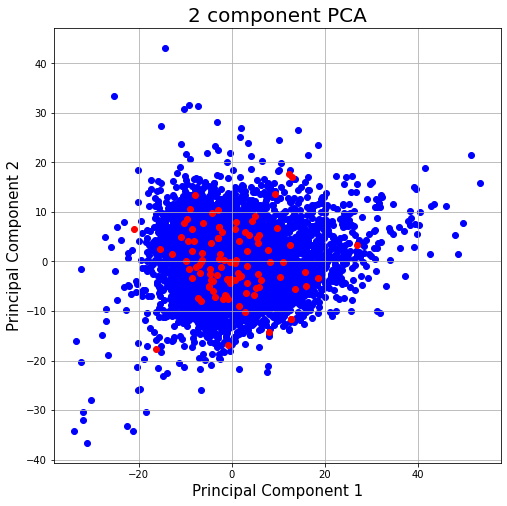

In [12]:
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(X_train_viz[:, 0], X_train_viz[:, 1], c='b')
ax.scatter(X_test_viz[:, 0], X_test_viz[:, 1], c='r')
ax.grid()

In [13]:
pca = PCA(0.95)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [14]:
X_train.shape

(7885, 102)

In [15]:
X_test.shape

(100, 102)

In [16]:
pca.explained_variance_ratio_

array([0.25145701, 0.12851167, 0.09570924, 0.06123657, 0.03055454,
       0.02930638, 0.02194137, 0.01754356, 0.01559318, 0.01535792,
       0.01319321, 0.01160125, 0.01069894, 0.00985032, 0.0095206 ,
       0.00931404, 0.00898854, 0.00860392, 0.00851468, 0.00781321,
       0.00743359, 0.00700254, 0.00669515, 0.00659075, 0.00629413,
       0.00551012, 0.00531293, 0.00502443, 0.00486519, 0.00434186,
       0.00408461, 0.00401212, 0.00381359, 0.0035175 , 0.00344017,
       0.00336508, 0.00327289, 0.00307506, 0.00295424, 0.00286367,
       0.00279462, 0.00266879, 0.0026144 , 0.00251662, 0.00247878,
       0.00239494, 0.00231726, 0.00227336, 0.00219538, 0.00210454,
       0.0020667 , 0.00204969, 0.00200569, 0.00191204, 0.00184375,
       0.00183233, 0.00180317, 0.00173437, 0.00168731, 0.0016388 ,
       0.00160524, 0.00157274, 0.00154634, 0.00152539, 0.00151253,
       0.00150244, 0.00146502, 0.00143649, 0.00140604, 0.00138182,
       0.00135685, 0.00133182, 0.00127606, 0.00126232, 0.00123

In [10]:
neigh = NearestNeighbors(10)
neigh.fit(X_train)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [11]:
def count_good_recommend(query_idx, answer_list, trhold):
    counter = 0
    query_id = int(df_test.iloc[query_idx].track[:-4])
    relevant = [query_id]
    query_tags = main_dict[query_id]['all_tags']
    for idx in answer_list:
        answer_id = int(df_train.iloc[idx].track[:-4])
        answer_tags = main_dict[answer_id]['all_tags']
        score = 0
        i = 0
        for tag in answer_tags:
            if tag in query_tags:
                i += 1
        if i == 0:
            continue
        
        precision = i / len(answer_tags)
        recall = i / len(query_tags)
        score = 2 * precision * recall / (precision + recall)
        if score >= trhold:        
            counter += 1
            relevant.append(answer_id)
    return counter, relevant

In [12]:
def count_ndcg(neighbors, relevant_list):
    dcg = 0
    idcg = 0
    for i in range(len(neighbors)):
        track = int(df_train.iloc[neighbors[i]].track[:-4])
        if track in relevant_list:
            dcg += 1 / math.log(i + 2, 2)
        idcg += 1 / math.log(i + 2, 2)
    ndcg = dcg / idcg
    return ndcg

In [13]:
mean_ap = 0
ndcg = 0
for i in range(100):
    neighbors = neigh.kneighbors([X_test[i]])[1][0]
    relevant_num, relevant_list = count_good_recommend(i, neighbors, trhold=0.4)
    print(relevant_list)

    p_at_10 = relevant_num / 10
    mean_ap += p_at_10
    ndcg += count_ndcg(neighbors, relevant_list[1:])
mean_ap /= 100 
mean_ndcg = ndcg / 100

[10673]
[66643]
[194, 211]
[74421]
[131553]
[24431, 24422, 36987, 24425, 36994]
[144469, 91934, 67017]
[87100, 87106, 87098]
[69204]
[27454, 16995]
[4835, 4836]
[667, 666]
[14063]
[137171]
[61172, 65752, 61174, 89456]
[107579, 107588]
[137171]
[24901]
[48463, 51785, 45102]
[145550]
[11786, 11788]
[73764]
[12394]
[73761]
[108962, 52522, 126670, 127203]
[190, 621, 211, 200]
[62337]
[64093]
[4233]
[75752, 123641]
[124702, 11782, 149124, 108491]
[73368, 73371, 73367]
[4079, 4073]
[55121, 55124, 89456]
[39357]
[81554]
[43020, 56474, 17605]
[17607]
[117886, 117885, 117883]
[67016, 34147, 67017, 110439]
[26021, 64631]
[43696]
[55235, 152258, 38351, 55240, 55241, 64407]
[39291]
[63470, 106956, 63471]
[69204]
[22476, 14590]
[87097, 87103, 108885, 87101]
[26600]
[24898]
[12050, 12065, 40242, 12062, 11508, 12060]
[108879]
[57273]
[51305]
[33020]
[124754, 130137]
[110261]
[49073]
[35462]
[131657, 131656, 131658]
[3720]
[44799]
[124876, 133434, 134449]
[97886, 97887]
[93075]
[117288]
[1040, 125551]

In [14]:
mean_ap

0.09199999999999997

In [15]:
mean_ndcg

0.10503118055892294

In [16]:
X_train.shape

(7885, 337)

In [26]:
print(f'without periodic meanAP {mean_ap}, meanNDCG {mean_ndcg}')

without periodic meanAP 0.08699999999999998, meanNDCG 0.10844735563242787


In [25]:
print(f'only periodic meanAP {mean_ap}, meanNDCG {mean_ndcg}')

only periodic meanAP 0.08799999999999997, meanNDCG 0.10368944379228173


In [23]:
print(f'periodic + highlevel meanAP {mean_ap}, meanNDCG {mean_ndcg}')

periodic + highlevel meanAP 0.09199999999999996, meanNDCG 0.10261123235295287


In [17]:
print(f'without PCA meanAP {mean_ap}, meanNDCG {mean_ndcg}')

without PCA meanAP 0.09199999999999997, meanNDCG 0.10503118055892294
